# Convolutional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visiual data. Such as the camera of a self-driving car recognizing the car in front

## Get the Data

<a href="https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip">Food101 Dataset(Modified only pizza and steak)</a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data 

In [8]:
import os

# Walk through pizza_steak/train and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [9]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    print(f"Image shape: {img.shape}")
    plt.imshow(img)
    return img

Image shape: (382, 512, 3)


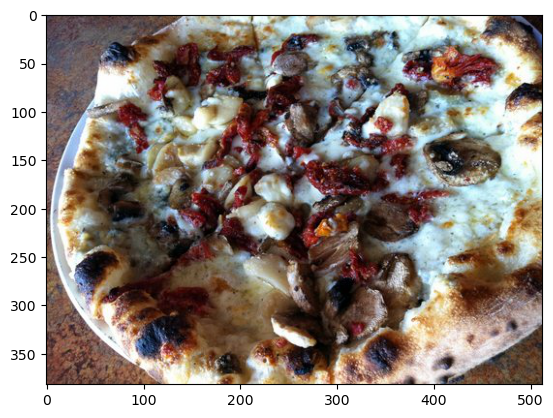

In [33]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [35]:
img/255

array([[[0.19215686, 0.19215686, 0.3254902 ],
        [0.20392157, 0.2       , 0.3254902 ],
        [0.21568627, 0.20392157, 0.3254902 ],
        ...,
        [0.07843137, 0.05490196, 0.00784314],
        [0.08235294, 0.05882353, 0.01176471],
        [0.09803922, 0.0745098 , 0.01960784]],

       [[0.22352941, 0.21960784, 0.34117647],
        [0.23137255, 0.22745098, 0.34901961],
        [0.25490196, 0.24313725, 0.35686275],
        ...,
        [0.08627451, 0.05882353, 0.02745098],
        [0.08627451, 0.05882353, 0.01960784],
        [0.08235294, 0.05490196, 0.01568627]],

       [[0.27843137, 0.27058824, 0.36470588],
        [0.2627451 , 0.25490196, 0.34901961],
        [0.2745098 , 0.25882353, 0.34901961],
        ...,
        [0.09803922, 0.06666667, 0.05490196],
        [0.09803922, 0.06666667, 0.05490196],
        [0.0745098 , 0.04313725, 0.03137255]],

       ...,

       [[0.39607843, 0.23921569, 0.2       ],
        [0.45490196, 0.29803922, 0.25882353],
        [0.43529412, 0

## An end-to-end example

Let's build a convolutional neural network to find our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir  = "pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
                        
